
Processing final_dataset_csv/5s.csv


C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



5s.csv Results:
Final Training Accuracy: 0.6765
Final Validation Accuracy: 0.5556
Test Accuracy: 0.7273

Processing final_dataset_csv/5s_overlap.csv


C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



5s_overlap.csv Results:
Final Training Accuracy: 0.7518
Final Validation Accuracy: 0.7143
Test Accuracy: 0.7955

Processing final_dataset_csv/10s.csv


C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



10s.csv Results:
Final Training Accuracy: 0.6765
Final Validation Accuracy: 0.2222
Test Accuracy: 0.3636

Processing final_dataset_csv/10s_overlap.csv


C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



10s_overlap.csv Results:
Final Training Accuracy: 0.8125
Final Validation Accuracy: 0.6471
Test Accuracy: 0.6190

Processing final_dataset_csv/15s.csv


C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



15s.csv Results:
Final Training Accuracy: 0.6818
Final Validation Accuracy: 0.3333
Test Accuracy: 0.6250

Processing final_dataset_csv/15s_overlap.csv


C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



15s_overlap.csv Results:
Final Training Accuracy: 0.8049
Final Validation Accuracy: 0.6364
Test Accuracy: 0.8571


=== Final Model Comparison ===
           Segment  Train Acc   Val Acc  Test Acc  Samples
5  15s_overlap.csv   0.804878  0.636364  0.857143       66
1   5s_overlap.csv   0.751825  0.714286  0.795455      216
0           5s.csv   0.676471  0.555556  0.727273      108
4          15s.csv   0.681818  0.333333  0.625000       36
3  10s_overlap.csv   0.812500  0.647059  0.619048      102
2          10s.csv   0.676471  0.222222  0.363636       54


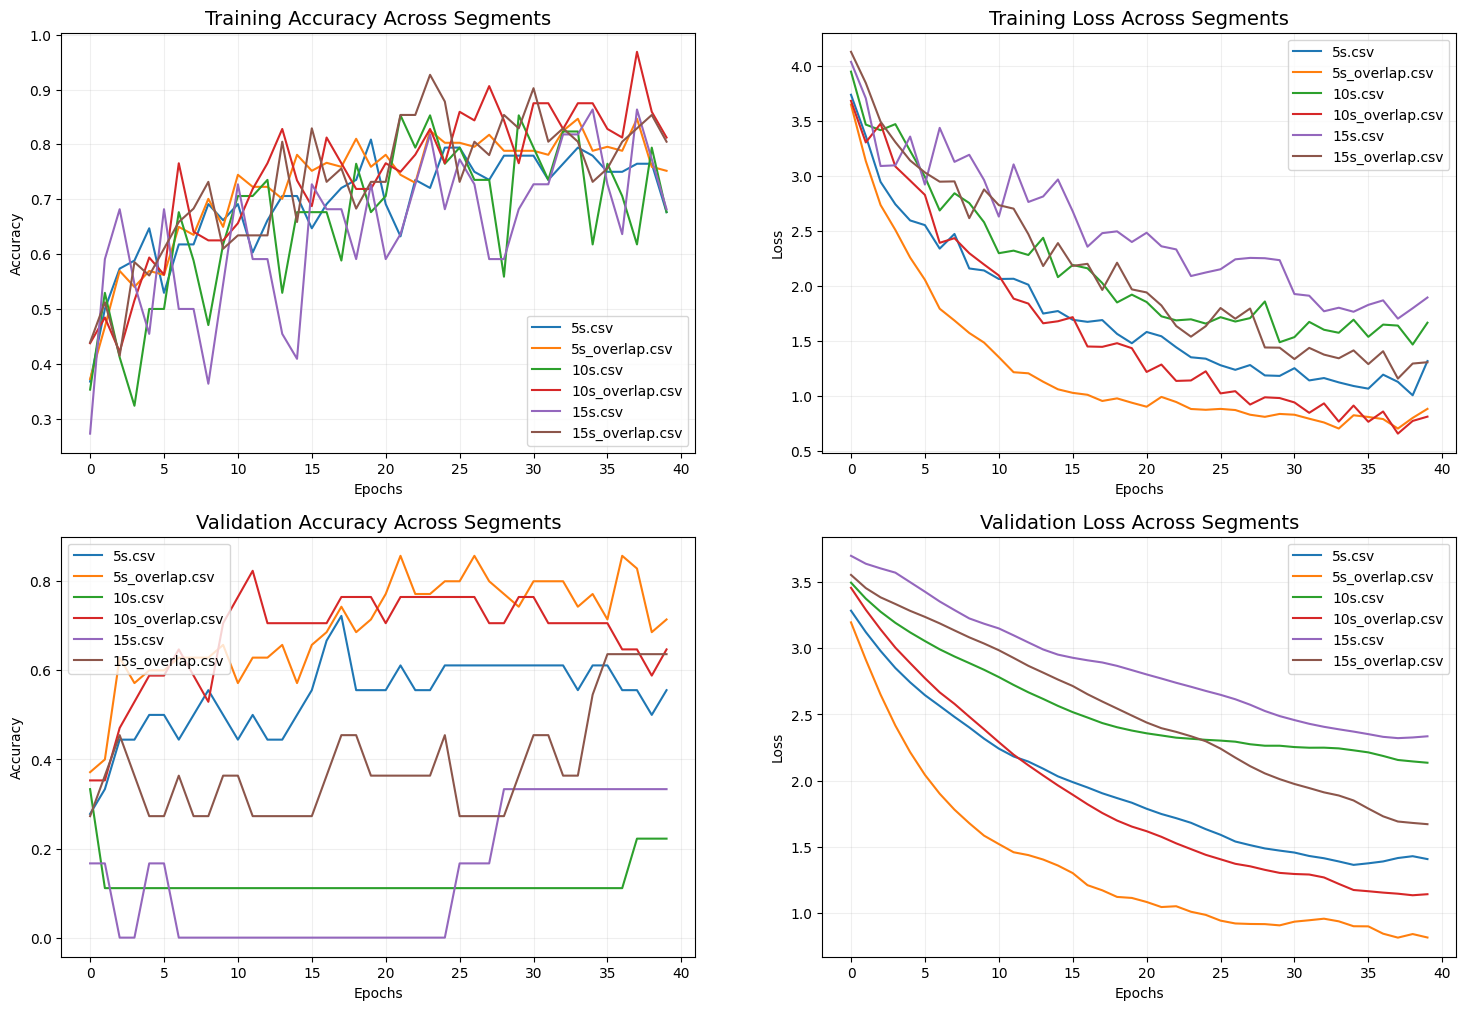

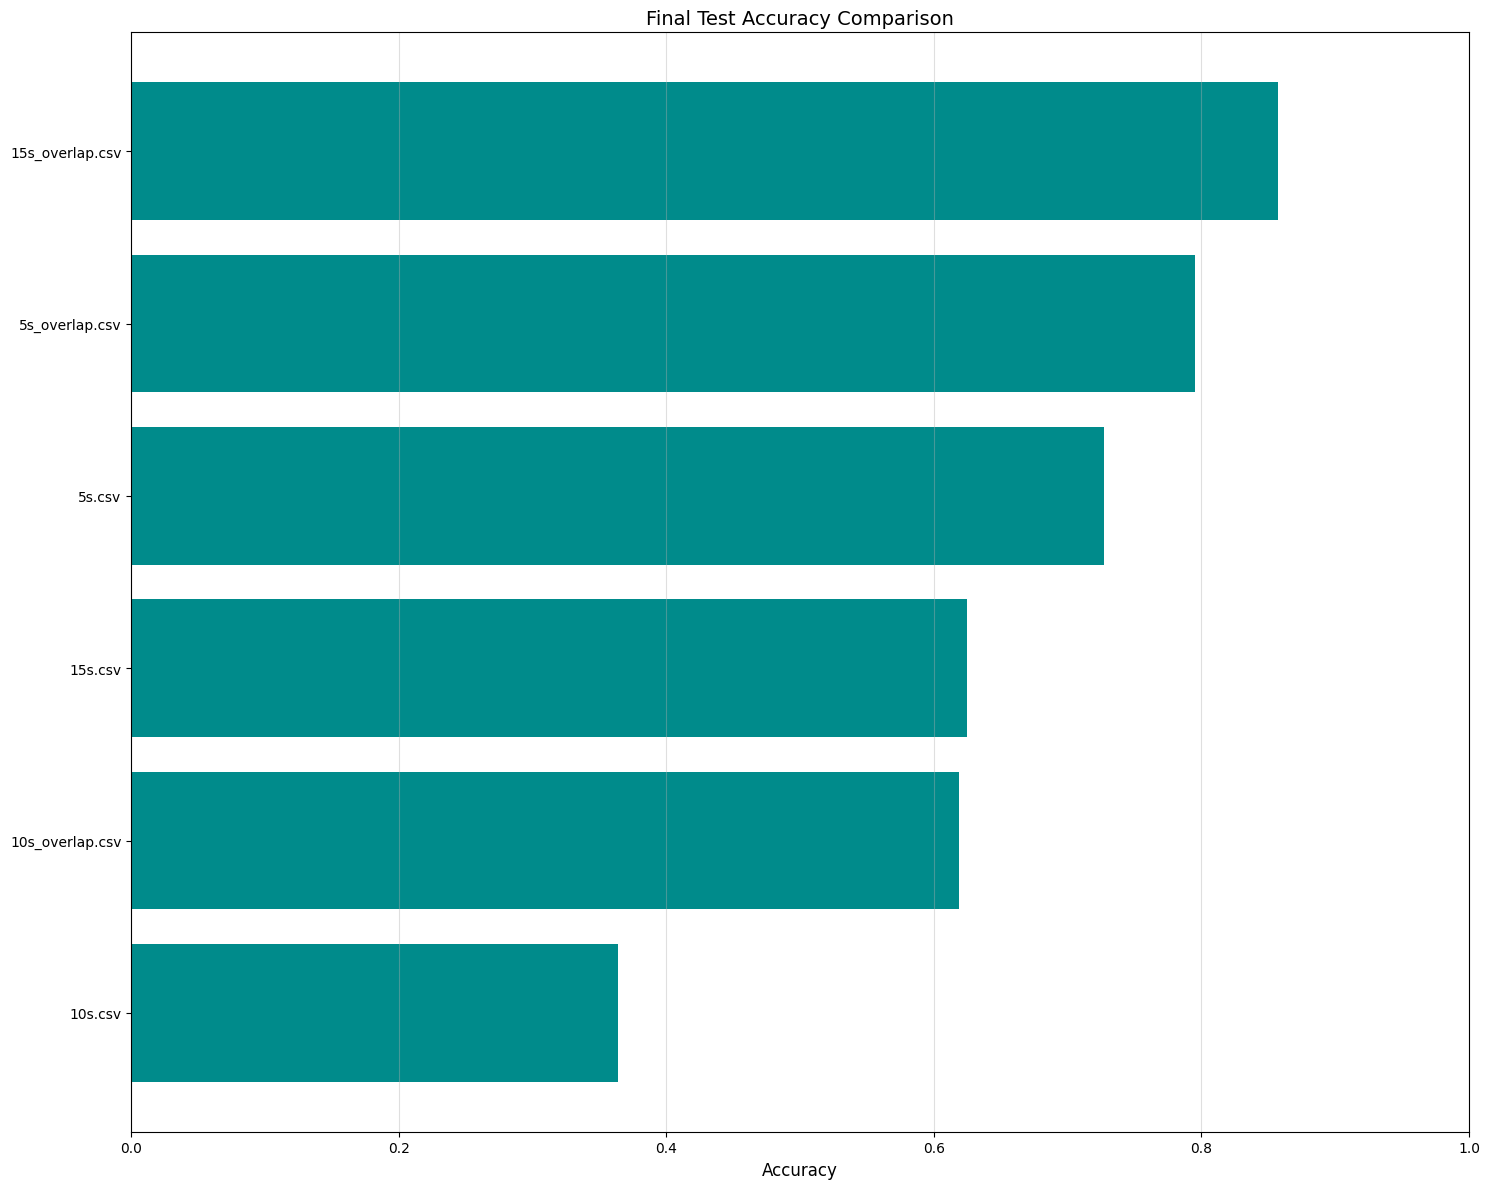

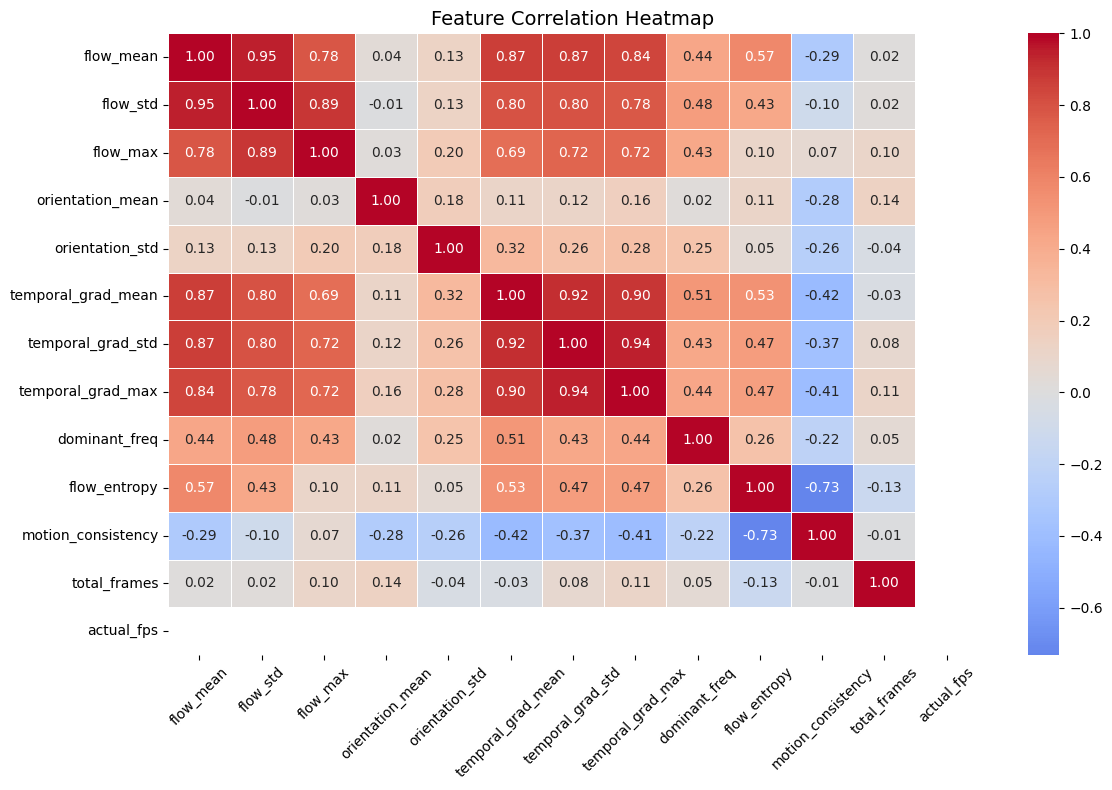

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
import seaborn as sns

def train_all_models(csv_file):
    try:
        df = pd.read_csv(csv_file)
        if len(df) < 10:
            print(f"Skipping {csv_file} - only {len(df)} samples")
            return None
            
        # Preprocessing
        X = df.drop(columns=['state', 'video_name', 'view', 'segment_duration', 'is_overlap'])
        y = LabelEncoder().fit_transform(df['state'])
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y)
        
        # Scale features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Enhanced model architecture
        model = Sequential([
            
            
            Dense(64, activation='relu', 
                 input_dim=X_train.shape[1],
                 kernel_regularizer=L2(0.01)),
            BatchNormalization(),
            Dropout(0.5),
            
            Dense(32, activation='relu',
                 kernel_regularizer=L2(0.05)),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(16, activation='relu',
                 kernel_regularizer=L2(0.005)),
            BatchNormalization(),
            Dropout(0.1),
            Dense(len(np.unique(y)), activation='softmax')
        ])
        
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
        
        # Training with early stopping
        history = model.fit(X_train, y_train,
                            epochs=40,
                            batch_size=16,
                            validation_split=0.2,
                            verbose=0)
        
        # Get metrics
        train_acc = history.history['accuracy'][-1]
        val_acc = history.history['val_accuracy'][-1]
        test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
        
        print(f"\n{os.path.basename(csv_file)} Results:")
        print(f"Final Training Accuracy: {train_acc:.4f}")
        print(f"Final Validation Accuracy: {val_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        
        return {
            'segment': os.path.basename(csv_file),
            'train_accuracy': train_acc,
            'val_accuracy': val_acc,
            'test_accuracy': test_acc,
            'samples': len(df),
            'history': history.history
        }
        
    except Exception as e:
        print(f"Error processing {csv_file}: {str(e)}")
        return None

if __name__ == "__main__":
    # Define segment files
    segment_files = [
        'final_dataset_csv/5s.csv',
        'final_dataset_csv/5s_overlap.csv',
        'final_dataset_csv/10s.csv',
        'final_dataset_csv/10s_overlap.csv',
        'final_dataset_csv/15s.csv',
        'final_dataset_csv/15s_overlap.csv'
    ]
    
    # Train and compare models
    results = []
    for csv_file in segment_files:
        print(f"\n{'='*40}\nProcessing {csv_file}")
        result = train_all_models(csv_file)
        if result:
            results.append(result)
    
    # Generate comparison report
    print("\n\n=== Final Model Comparison ===")
    comparison_df = pd.DataFrame([{
        'Segment': r['segment'],
        'Train Acc': r['train_accuracy'],
        'Val Acc': r['val_accuracy'],
        'Test Acc': r['test_accuracy'],
        'Samples': r['samples']
    } for r in results]).sort_values('Test Acc', ascending=False)
    
    print(comparison_df)
    
    # Visualization
    plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
for res in results:
    plt.plot(res['history']['accuracy'], label=res['segment'])
plt.title('Training Accuracy Across Segments', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.2)

# 2. Training Loss
plt.subplot(2, 2, 2)
for res in results:
    plt.plot(res['history']['loss'], label=res['segment'])
plt.title('Training Loss Across Segments', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.2)

# 3. Validation Accuracy
plt.subplot(2, 2, 3)
for res in results:
    plt.plot(res['history']['val_accuracy'], label=res['segment'])
plt.title('Validation Accuracy Across Segments', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.2)

# 4. Validation Loss
plt.subplot(2, 2, 4)
for res in results:
    plt.plot(res['history']['val_loss'], label=res['segment'])
plt.title('Validation Loss Across Segments', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.2)
    
    # Test Accuracy Comparison
plt.figure(figsize=(15, 12))
sorted_results = comparison_df.sort_values('Test Acc')
plt.barh(sorted_results['Segment'], sorted_results['Test Acc'], color='darkcyan')
plt.title('Final Test Accuracy Comparison', fontsize=14)
plt.xlabel('Accuracy', fontsize=12)
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.4)
    
plt.tight_layout()
plt.show()
numerical_cols = [
    'flow_mean', 'flow_std', 'flow_max',
    'orientation_mean', 'orientation_std',
    'temporal_grad_mean', 'temporal_grad_std', 
    'temporal_grad_max', 'dominant_freq',
    'flow_entropy', 'motion_consistency',
    'total_frames', 'actual_fps'
]
df = pd.read_csv('optical_flow_features.csv')
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, 
           annot=True, 
           fmt=".2f", 
           cmap='coolwarm', 
           center=0,
           linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()